**Question**
What are the best predictors of SAT scores?

The first step is to get data. From the CORGIS dataset project, we'll use the School Scores CSV file, containing information about average SAT scores by state from 2005 to 2015. For some additional predictors, we'll also use a data set about US public schools in the 2014-2015 school year, sourced from Kaggle, at this url: https://www.kaggle.com/datasets/carlosaguayo/usa-public-schools/data. 

Since the only year our 2 data sets overlap is 2014, is makes sense to narrow our research question to:

**What were the best predictors of the average SAT scores by state?**

We'll look at the predictive value of each of these predictors invididually:
1. Average number of full time teachers
2. Average student/teacher ratio
3. Total number of test takers
4. Average GPAs by subject (Arts/Music, Foreign Languages, Mathematics, Natural Sciences, Social Sciences/History)
5. Average number of years of instruction in each subject (Arts/Music, Foreign Languages, Mathematics, Natural Sciences, Social Sciences/History)
6. Proportion of test takers in each family yearly income bracket (< 20k, 20 - 40k, 40 - 60k, 60 - 80k, 80 - 100k, > 100k)
7. Proportion of test takers with certain overall GPAs (A+, A, A-, B, C, D or lower, no response)
8. Proportion of test takers of each gender (Male or Female)


We first read in the data sets and determine what, if any, cleaning we need to do. We can start with the SAT data set:

In [100]:
import pandas
import numpy
from sklearn.linear_model import LinearRegression

In [101]:
sat_data = pandas.read_csv("../data/school_scores.csv")

We take a look at the first few rows of the data to get a sense of what, if any, cleaning we need to do

In [103]:
sat_data.head()

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,1096,596,613,1209,156,292,448,219,250,469
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,787,423,375,798,47,116,163,109,115,224
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,3814,1831,1679,3510,327,630,957,412,501,913
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,443,242,226,468,49,83,132,77,93,170
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,37605,16078,14966,31044,5451,8792,14243,5011,4766,9777


We can learn a few things from just looking at this data:
1. The data is broken down by the math and verbal scores
2. This data contains data from more years than 2014
3. This data is already pretty clean.

First, we should extract only the scores from 2014. Then, because the data is so broken down, we first want to transform the data to focus on the total SAT scores. To find a good approximation of this, we can take sum of the average math and the verbal scores. A casuality of this decision is that we can't really look at score ranges for total scores, since it's possible a student could have scores that fall in two different ranges. However, we still have plenty of other potential predictors to consider.

We can also normalize the columns for numbers of test takers by income bracket, overall GPA, and gender. Since the states have such different numbers of total test takers, normalinzing by number of test takers will let us see the true relationships that might otherwise been lost due to large differences in the number of test takers.

In [105]:
sat_data_2014 = sat_data.loc[sat_data["Year"] == 2014, :].iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 
                                                                   25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61]].copy()
sat_data_2014["Total_Overall_Score"] = sat_data_2014["Total.Math"] + sat_data_2014["Total.Verbal"]
sat_data_2014 = sat_data_2014.drop(columns = ["Total.Math", "Total.Verbal"])
total_test_takers = sat_data_2014["Total.Test-takers"]
cols = ["Family Income.Between 20-40k.Test-takers", "Family Income.Between 40-60k.Test-takers", "Family Income.Between 60-80k.Test-takers", 
        "Family Income.Between 80-100k.Test-takers", "Family Income.Less than 20k.Test-takers", "Family Income.More than 100k.Test-takers",
        "GPA.A minus.Test-takers", "GPA.A plus.Test-takers", "GPA.A.Test-takers", "GPA.B.Test-takers", "GPA.C.Test-takers", 
        "GPA.D or lower.Test-takers", "GPA.No response.Test-takers", "Gender.Female.Test-takers", "Gender.Male.Test-takers"]
for col in cols:
    sat_data_2014[col] = sat_data_2014[col]/total_test_takers
sat_data_2014.head()

,Year,State.Code,State.Name,Total.Test-takers,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,Academic Subjects.Foreign Languages.Average GPA,Academic Subjects.Foreign Languages.Average Years,...,GPA.A minus.Test-takers,GPA.A plus.Test-takers,GPA.A.Test-takers,GPA.B.Test-takers,GPA.C.Test-takers,GPA.D or lower.Test-takers,GPA.No response.Test-takers,Gender.Female.Test-takers,Gender.Male.Test-takers,Total_Overall_Score
471,2014,AL,Alabama,3172,3.90,2.3,3.63,3.9,3.60,2.5,...,0.205549,0.154792,0.304855,0.261980,0.048550,0.000631,0.023644,0.568096,0.431904,1089
472,2014,AK,Alaska,3943,3.78,2.0,3.47,3.9,3.41,2.2,...,0.178544,0.062135,0.203652,0.373827,0.091555,0.003297,0.086990,0.550089,0.449911,1011
473,2014,AZ,Arizona,22624,3.85,2.3,3.51,3.9,3.49,2.5,...,0.204562,0.080446,0.243060,0.352767,0.067318,0.000972,0.050875,0.553085,0.446915,1049
474,2014,AR,Arkansas,1222,3.94,2.5,3.78,4.0,3.71,2.7,...,0.200491,0.215221,0.345336,0.195581,0.024550,0.000000,0.018822,0.564648,0.435352,1148
475,2014,CA,California,236923,3.79,1.9,3.42,3.9,3.41,2.8,...,0.187964,0.044829,0.176471,0.429131,0.087391,0.001131,0.073083,0.551331,0.448669,1010


In [106]:
print(sat_data_2014.shape)
sat_data_2014["State.Code"].unique()

(53, 32)


array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

We can then focus on the data set.

In [108]:
public_schools_data_unclean = pandas.read_csv("../data/Public_Schools.csv")
public_schools_data_unclean.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,...,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,...,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,...,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,...,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE


In [109]:
print(public_schools_data_unclean["ENROLLMENT"].min())
print(public_schools_data_unclean["FT_TEACHER"].min())

-2
-1


We can see we have some negative values for columns where all the values should be greater than or equal to 0, and also generally have a lot more columns then we need, since we aren't looking at specific location data for this analysis. Furthermore, since we're looking at average SAT scores by state, we want to group the data by state and get the average number of full-time teachers and students enrolled.

In [111]:
public_schools_data_clean = public_schools_data_unclean.replace(-1, numpy.nan)
for col in ["ENROLLMENT", "FT_TEACHER"]:
    public_schools_data_clean[col] = public_schools_data_clean[col].fillna(public_schools_data_clean.groupby("STATE")[col].transform("mean"))
public_schools_data_clean["FT_TEACHER"] = public_schools_data_clean["FT_TEACHER"].fillna(public_schools_data_clean["FT_TEACHER"]
                                                                                         .mean(skipna=True))
state_avg = (public_schools_data_clean.groupby("STATE")[["ENROLLMENT", "FT_TEACHER"]].mean()
             .reset_index()).rename(columns={"ENROLLMENT": "Avg_Students","FT_TEACHER": "Avg_Teachers"})
state_avg

,STATE,Avg_Students,Avg_Teachers
0,AK,258.729783,15.247525
1,AL,550.005913,30.949017
2,AR,446.309091,33.096532
3,AZ,488.225693,34.015636
4,CA,609.912370,26.420379
5,CO,482.332610,27.806027
6,CT,417.699769,36.428952
7,DC,354.793860,30.460465
8,DE,611.118721,44.142202
9,FL,637.961583,45.774895


We decided to use imputation to replace negative values in the data, replacing them with the relevant mean value for their state. So for example, if a school in Iowa had -1 for the number of students enrolled, the -1 would be replaced with the average number of students enrolled for Iowa only. The exceptions for this were Utah and Wisconsin; as all of the schools in those states in the data set had -1 for the number of full time teachers, those were replaced with the average number of full time teachers nationally. With that done, we can then compute the average student-to-teacher ratio for each state, and join it with the SAT data.

In [113]:
state_avg["Avg_Student_Teacher_Ratio"] = state_avg["Avg_Students"]/state_avg["Avg_Teachers"]
state_avg = state_avg.rename(columns ={"STATE": "State.Code"})
combined_sat_2014 = pandas.merge(sat_data_2014, state_avg, how = "inner", on = "State.Code")
combined_sat_2014.head()

,Year,State.Code,State.Name,Total.Test-takers,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,Academic Subjects.Foreign Languages.Average GPA,Academic Subjects.Foreign Languages.Average Years,...,GPA.B.Test-takers,GPA.C.Test-takers,GPA.D or lower.Test-takers,GPA.No response.Test-takers,Gender.Female.Test-takers,Gender.Male.Test-takers,Total_Overall_Score,Avg_Students,Avg_Teachers,Avg_Student_Teacher_Ratio
0,2014,AL,Alabama,3172,3.90,2.3,3.63,3.9,3.60,2.5,...,0.261980,0.048550,0.000631,0.023644,0.568096,0.431904,1089,550.005913,30.949017,17.771353
1,2014,AK,Alaska,3943,3.78,2.0,3.47,3.9,3.41,2.2,...,0.373827,0.091555,0.003297,0.086990,0.550089,0.449911,1011,258.729783,15.247525,16.968642
2,2014,AZ,Arizona,22624,3.85,2.3,3.51,3.9,3.49,2.5,...,0.352767,0.067318,0.000972,0.050875,0.553085,0.446915,1049,488.225693,34.015636,14.352978
3,2014,AR,Arkansas,1222,3.94,2.5,3.78,4.0,3.71,2.7,...,0.195581,0.024550,0.000000,0.018822,0.564648,0.435352,1148,446.309091,33.096532,13.485071
4,2014,CA,California,236923,3.79,1.9,3.42,3.9,3.41,2.8,...,0.429131,0.087391,0.001131,0.073083,0.551331,0.448669,1010,609.912370,26.420379,23.084921


**Analysis**

We will use linear regression for each possible predictor, to determine if any of them have any predictive power individually. Then, we'll combine to best best predictors into a comprehensive model.

We'll start with the average number of full-time teachers per state. It's possible that states that have more teachers would also have more investment in education in general, resulting in higher SAT scores:

R squared:  0.18155114131808403
Correlation:  -0.42608818490787104


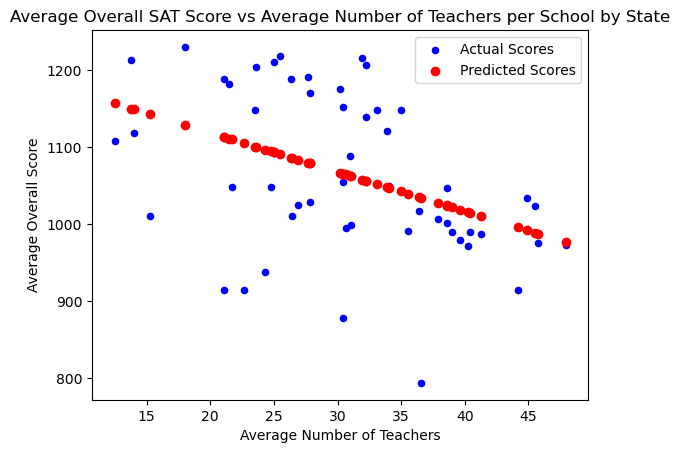

In [115]:
import matplotlib.pyplot as plt

scores = combined_sat_2014.Total_Overall_Score
teachers = combined_sat_2014[["Avg_Teachers"]]
scores_teachers_lm = LinearRegression().fit(teachers, scores)
scores_teachers_plot = combined_sat_2014.plot.scatter(x = "Avg_Teachers", y = "Total_Overall_Score", color = "blue", label = "Actual Scores")
scores_teachers_plot.scatter(combined_sat_2014["Avg_Teachers"], 
                             scores_teachers_lm.predict(combined_sat_2014[["Avg_Teachers"]]), color="red", label="Predicted Scores")
scores_teachers_plot.legend()
scores_teachers_plot.set_xlabel("Average Number of Teachers")
scores_teachers_plot.set_ylabel("Average Overall Score")
scores_teachers_plot.set_title("Average Overall SAT Score vs Average Number of Teachers per School by State")
print("R squared: ", scores_teachers_lm.score(teachers, scores))
print("Correlation: ", combined_sat_2014.Avg_Teachers.corr(scores))

From the plot, we can see that there is a weak negative relationship between the average number of teachers and the average overall SAT score, and the relationship likely isn't strong enough to serve as a predictor. A better measure could possibly be the average student to teacher ratio for each state. After all, it doesn't mean much to have a lot of teachers if there's such a large amount of students they have to manage; a smaller student-to-teacher ratio could indicate that teachers would be able to give more one-on-one attention and prep to students.

R squared:  0.0016072751228832782
Correlation:  0.0400908358965424


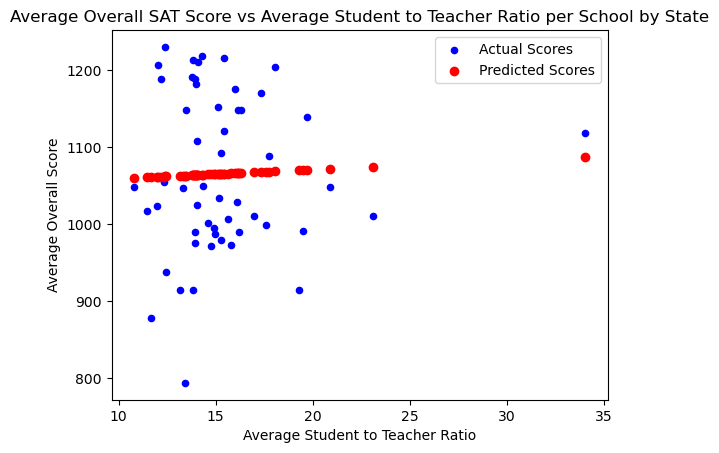

In [117]:
ratio = combined_sat_2014[["Avg_Student_Teacher_Ratio"]]
scores_ratio_lm = LinearRegression().fit(ratio, scores)
scores_ratio_plot = combined_sat_2014.plot.scatter(x = "Avg_Student_Teacher_Ratio", y = "Total_Overall_Score", color = "blue", 
                                                   label = "Actual Scores")
scores_ratio_plot.scatter(combined_sat_2014["Avg_Student_Teacher_Ratio"], 
                             scores_ratio_lm.predict(combined_sat_2014[["Avg_Student_Teacher_Ratio"]]), color="red", label="Predicted Scores")
scores_ratio_plot.legend()
scores_ratio_plot.set_xlabel("Average Student to Teacher Ratio")
scores_ratio_plot.set_ylabel("Average Overall Score")
scores_ratio_plot.set_title("Average Overall SAT Score vs Average Student to Teacher Ratio per School by State")
print("R squared: ", scores_ratio_lm.score(ratio, scores))
print("Correlation: ", combined_sat_2014.Avg_Student_Teacher_Ratio.corr(scores))

Unfortunately, average the student to teacher ratio is a worse predictor than the average number of teachers, having esstentially no relationship with the average SAT score. Another possible predictor to try is the number of test takers by state.

R squared:  0.12058130764889496
Correlation:  -0.34724819315425515


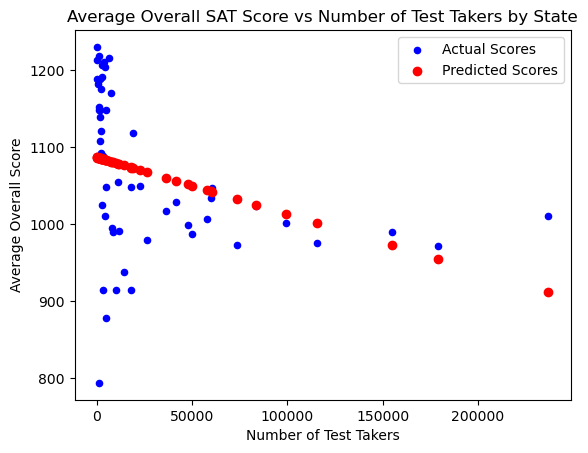

In [119]:
takers = combined_sat_2014[["Total.Test-takers"]]
scores_takers_lm = LinearRegression().fit(takers, scores)
scores_takers_plot = combined_sat_2014.plot.scatter(x = "Total.Test-takers", y = "Total_Overall_Score", color = "blue", 
                                                   label = "Actual Scores")
scores_takers_plot.scatter(combined_sat_2014["Total.Test-takers"], 
                             scores_takers_lm.predict(combined_sat_2014[["Total.Test-takers"]]), color="red", label="Predicted Scores")
scores_takers_plot.legend()
scores_takers_plot.set_ylabel("Average Overall Score")
scores_takers_plot.set_xlabel("Number of Test Takers")
scores_takers_plot.set_title("Average Overall SAT Score vs Number of Test Takers by State")
print("R squared: ", scores_takers_lm.score(takers, scores))
print("Correlation: ", takers["Total.Test-takers"].corr(scores))

From the plot, we see a weak, negative relationship between the number of test takers and the average overall SAT score. We can notice that it does seem that the average score does tend down as the number of test takers increases, but any relationship is muddled by the fast that most states have such a relatively low amount of test takers. Perhaps if we had the proportion of students who took the SAT out of all students eligible to take the test, we could find a stronger negative relationship.

We then move on to checking how the gender distribution of the test takers affects the overall SAT score.

R squared:  0.03440305974076874
Correlation:  -0.18548061823481382


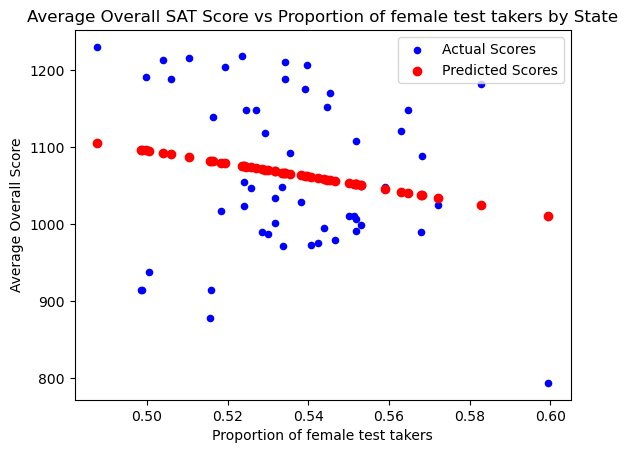

In [150]:
female = combined_sat_2014[["Gender.Female.Test-takers"]]
scores_female_lm = LinearRegression().fit(female, scores)
scores_female_plot = combined_sat_2014.plot.scatter(x = "Gender.Female.Test-takers", y = "Total_Overall_Score", color = "blue", 
                                                   label = "Actual Scores")
scores_female_plot.scatter(combined_sat_2014["Gender.Female.Test-takers"], 
                             scores_female_lm.predict(combined_sat_2014[["Gender.Female.Test-takers"]]), color="red", 
                           label="Predicted Scores")
scores_female_plot.legend()
scores_female_plot.set_ylabel("Average Overall Score")
scores_female_plot.set_xlabel("Proportion of female test takers")
scores_female_plot.set_title("Average Overall SAT Score vs Proportion of female test takers by State")
print("R squared: ", scores_female_lm.score(female, scores))
print("Correlation: ", female["Gender.Female.Test-takers"].corr(scores))

R squared:  0.034403059740768516
Correlation:  0.18548061823481382


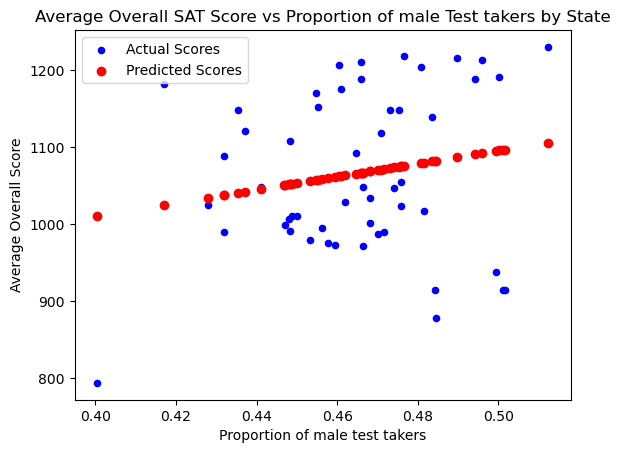

In [152]:
male = combined_sat_2014[["Gender.Male.Test-takers"]]
scores_male_lm = LinearRegression().fit(male, scores)
scores_male_plot = combined_sat_2014.plot.scatter(x = "Gender.Male.Test-takers", y = "Total_Overall_Score", color = "blue", 
                                                   label = "Actual Scores")
scores_male_plot.scatter(combined_sat_2014["Gender.Male.Test-takers"], 
                             scores_male_lm.predict(combined_sat_2014[["Gender.Male.Test-takers"]]), color="red", 
                           label="Predicted Scores")
scores_male_plot.legend()
scores_male_plot.set_ylabel("Average Overall Score")
scores_male_plot.set_xlabel("Proportion of male test takers")
scores_male_plot.set_title("Average Overall SAT Score vs Proportion of male Test takers by State")
print("R squared: ", scores_male_lm.score(male, scores))
print("Correlation: ", male["Gender.Male.Test-takers"].corr(scores))

From the plots, there is a weak negative relationship between the propertion of female test takers and the state average overall SAT score, and a weak positive relationship between the propertion of female test takers and the state average overall SAT score. Intrestingly, these relationships mirror each other, with the same R squared value.